<a href="https://colab.research.google.com/github/Auranisaa/Paparan-Kompetensi-Global/blob/main/Paparan_Global_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset ini berisikan data penjualan dari pasar bunga yang ada di DKI Jakarta.

File ini berisikan
1. pembersiha data
2. Visualisasi data
3. Clustering dengan K-Means


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df= pd.read_csv('/content/Filedata Data Omzet Pemasaran Bunga dan Tanaman Hias.csv')
df.head()

,periode_data,tahun,bulan,lokasi,jenis_komoditi,volume_komoditi,satuan_komoditi,omzet
0,202302,2023,Februari,Penangkar Bibit Ragunan,Jeruk limo,50.0,Pohon,7500000
1,202302,2023,Februari,Penangkar Bibit Ragunan,Jeruk limonti,23.0,Pohon,3450000
2,202302,2023,Februari,Penangkar Bibit Ragunan,Jeruk Bali,7.0,Pohon,1400000
3,202302,2023,Februari,Penangkar Bibit Ragunan,Jeruk sankis,9.0,Pohon,540000
4,202302,2023,Februari,Penangkar Bibit Ragunan,Jeruk Nagami,24.0,Pohon,6000000


In [6]:
jumlah_jenis_komoditi = df['jenis_komoditi'].nunique()
print("Jumlah jenis komoditi unik:", jumlah_jenis_komoditi)

frekuensi_jenis_komoditi = df['jenis_komoditi'].value_counts()
print("Frekuensi setiap jenis komoditi:")
print(frekuensi_jenis_komoditi)

Jumlah jenis komoditi unik: 205
Frekuensi setiap jenis komoditi:
jenis_komoditi
Pakis               36
Ros Malang          24
Andong              24
Ruskus              24
Carnation           24
                    ..
Jati putih jabon     4
klengkeng durian     4
Oncidium             2
Phalanopsis          1
Denrobium            1
Name: count, Length: 205, dtype: int64


In [7]:
jumlah_satuan_komoditi = df['satuan_komoditi'].nunique()
print("Jumlah satuan komoditi:", jumlah_satuan_komoditi)

frekuensi_satuan_komoditi = df['satuan_komoditi'].value_counts()
print("Frekuensi setiap satuan komoditi:")
print(frekuensi_satuan_komoditi)

Jumlah satuan komoditi: 13
Frekuensi setiap satuan komoditi:
satuan_komoditi
Pohon      1188
Ikat        873
Gabung      156
Pot          85
Ktg          48
Bks          36
Buah         26
Koli         24
kuntum       12
tangkai      12
buah         12
Tangkai      12
Batang       12
Name: count, dtype: int64


In [9]:
df['omzet'] = pd.to_numeric(df['omzet'], errors='coerce')

df = df.dropna(subset=['omzet'])

total_omzet_per_komoditi = df.groupby('jenis_komoditi')['omzet'].sum().reset_index()
komoditi_tertinggi = total_omzet_per_komoditi.loc[total_omzet_per_komoditi['omzet'].idxmax()]

print("Jenis komoditi dengan omzet tertinggi:")
print(komoditi_tertinggi)

Jenis komoditi dengan omzet tertinggi:
jenis_komoditi       Dendrobium
omzet             51548065000.0
Name: 38, dtype: object


In [11]:
df_2023 = df[df['tahun'] == 2023]

omzet_per_lokasi = df_2023.groupby('lokasi')['omzet'].sum().reset_index()

print(omzet_per_lokasi)

                         lokasi         omzet
0        Pasar Bunga Rawabelong  4.626314e+10
1       Penangkar Bibit Ragunan  1.885400e+09
2  Sentra Promosi Bunga Klender  6.210000e+07
3         Taman Anggrek Ragunan  8.729012e+10


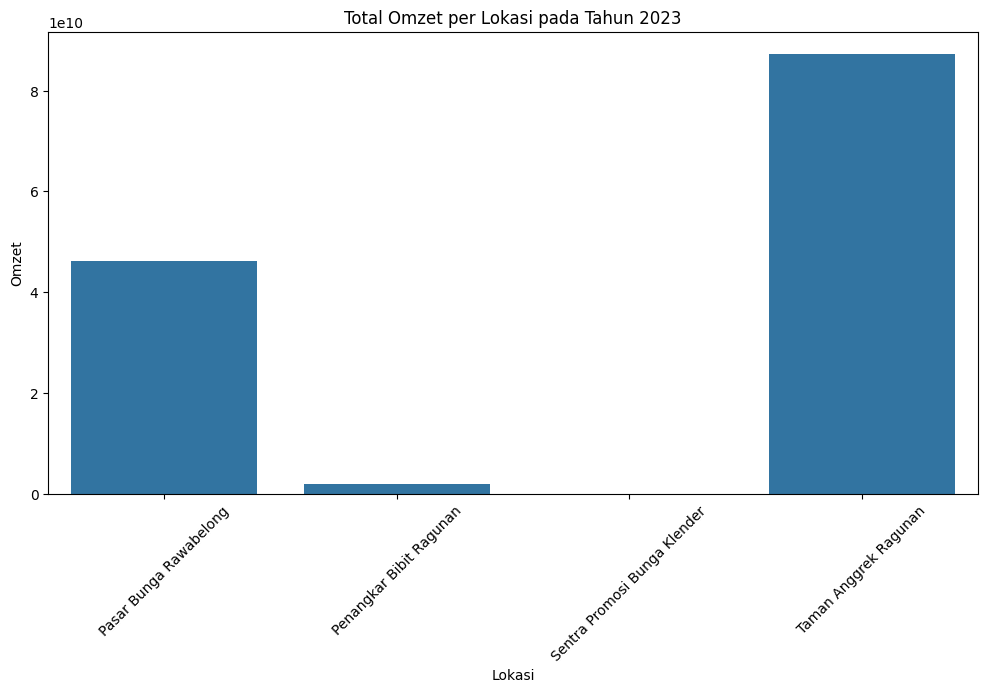

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=omzet_per_lokasi, x='lokasi', y='omzet')
plt.title('Total Omzet per Lokasi pada Tahun 2023')
plt.xlabel('Lokasi')
plt.ylabel('Omzet')
plt.xticks(rotation=45)
plt.show()

# **Data prep**

In [ ]:
print("Jumlah baris pada dataset:", df.shape[0])
print("Jumlah kolom pada dataset:", df.shape[1])
print("Jumlah nilai terduplikat:", df.duplicated().sum())
print("Jumlah missing values:", sum(df.isna().sum()))
print("Jumlah nilai 0:", df['volume_komoditi'].value_counts().get(0, 0))

Jumlah baris pada dataset: 2496
Jumlah kolom pada dataset: 8
Jumlah nilai terduplikat: 12
Jumlah missing values: 2
Jumlah nilai 0: 715


In [ ]:
df = df[df['volume_komoditi'] != 0]

In [ ]:
df['volume_komoditi'] = df['volume_komoditi'].replace([np.inf, -np.inf], np.nan).fillna(0).astype(int)
df['omzet'] = df['omzet'].replace([np.inf, -np.inf], np.nan).fillna(0).astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1781 entries, 0 to 2483
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   periode_data     1781 non-null   int64 
 1   tahun            1781 non-null   int64 
 2   bulan            1781 non-null   object
 3   lokasi           1781 non-null   object
 4   jenis_komoditi   1781 non-null   object
 5   volume_komoditi  1781 non-null   int64 
 6   satuan_komoditi  1781 non-null   object
 7   omzet            1781 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 125.2+ KB


In [ ]:
print("Jumlah baris pada dataset:", df.shape[0])
print("Jumlah kolom pada dataset:", df.shape[1])
print("Jumlah nilai terduplikat:", df.duplicated().sum())
print("Jumlah missing values:", sum(df.isna().sum()))
print("Jumlah nilai 0:", df['volume_komoditi'].value_counts().get(0, 0))

Jumlah baris pada dataset: 1781
Jumlah kolom pada dataset: 8
Jumlah nilai terduplikat: 0
Jumlah missing values: 0
Jumlah nilai 0: 1


In [ ]:
bulan_ke_angka = {'Januari': '01', 'Februari': '02', 'Maret': '03', 'April': '04', 'Mei': '05',
                  'Juni': '06', 'Juli': '07', 'Agustus': '08', 'September': '09',
                  'Oktober': '10', 'November': '11', 'Desember': '12'}

df['bulan'] = df['bulan'].apply(lambda x: bulan_ke_angka.get(x, x).zfill(2))

In [ ]:
cd /content/drive/MyDrive/tugaskuliah/sem6/Paparan_Global


/content/drive/MyDrive/tugaskuliah/sem6/Paparan_Global


In [ ]:
df.to_csv('datapaparanbersih.csv', index=False)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['lokasi', 'jenis_komoditi', 'satuan_komoditi']
numerical_cols = ['volume_komoditi', 'omzet']

encoder = OneHotEncoder(sparse=False)
encoded_categorical_data = encoder.fit_transform(data[categorical_cols])

encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_cols))

data_combined = pd.concat([data[numerical_cols], encoded_categorical_df], axis=1)

print(data_combined.head())

data_combined.to_csv('/content/drive/MyDrive/tugaskuliah/sem6/Paparan_Global/data_combined.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


   volume_komoditi    omzet  lokasi_Pasar Bunga Rawabelong  \
0               50  7500000                            0.0   
1               23  3450000                            0.0   
2                7  1400000                            0.0   
3                9   540000                            0.0   
4               24  6000000                            0.0   

   lokasi_Penangkar Bibit Ragunan  lokasi_Sentra Promosi Bunga Klender  \
0                             1.0                                  0.0   
1                             1.0                                  0.0   
2                             1.0                                  0.0   
3                             1.0                                  0.0   
4                             1.0                                  0.0   

   lokasi_Taman Anggrek Ragunan  jenis_komoditi_Agapantus  \
0                           0.0                       0.0   
1                           0.0                       0.0   

# Data visualisasi

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/tugaskuliah/sem6/Paparan_Global/datapaparanbersih.csv')

In [ ]:
print("Nilai unik di kolom 'lokasi':", data['lokasi'].unique())
print("Nilai unik di kolom 'bulan':", data['bulan'].unique())
print("Nilai unik di kolom 'bulan':", data['satuan_komoditi'].unique())

Nilai unik di kolom 'lokasi': ['Penangkar Bibit Ragunan' 'Pasar Bunga Rawabelong'
 'Sentra Promosi Bunga Klender' 'Taman Anggrek Ragunan']
Nilai unik di kolom 'bulan': [ 2  3  1  4  5  6  7  8  9 10 11 12]
Nilai unik di kolom 'bulan': ['Pohon' 'Bks' 'Ktg' 'Ikat' 'Buah' 'Gabung' 'kuntum' 'tangkai' 'Pot'
 'Koli' 'buah']


<ipython-input-21-71656442a573>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='lokasi', y='volume_komoditi', estimator=sum, ci=None)


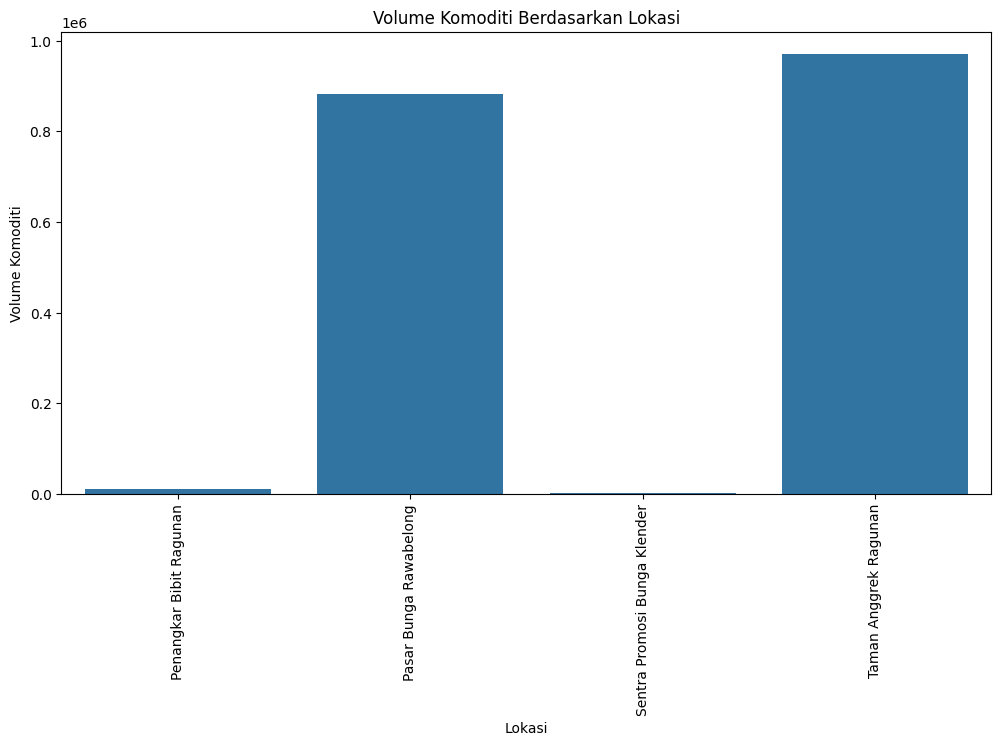

In [ ]:
plt.figure(figsize=(12, 6))

sns.barplot(data=data, x='lokasi', y='volume_komoditi', estimator=sum, ci=None)

plt.title('Volume Komoditi Berdasarkan Lokasi')
plt.xlabel('Lokasi')
plt.ylabel('Volume Komoditi')

plt.xticks(rotation=90)

plt.show()

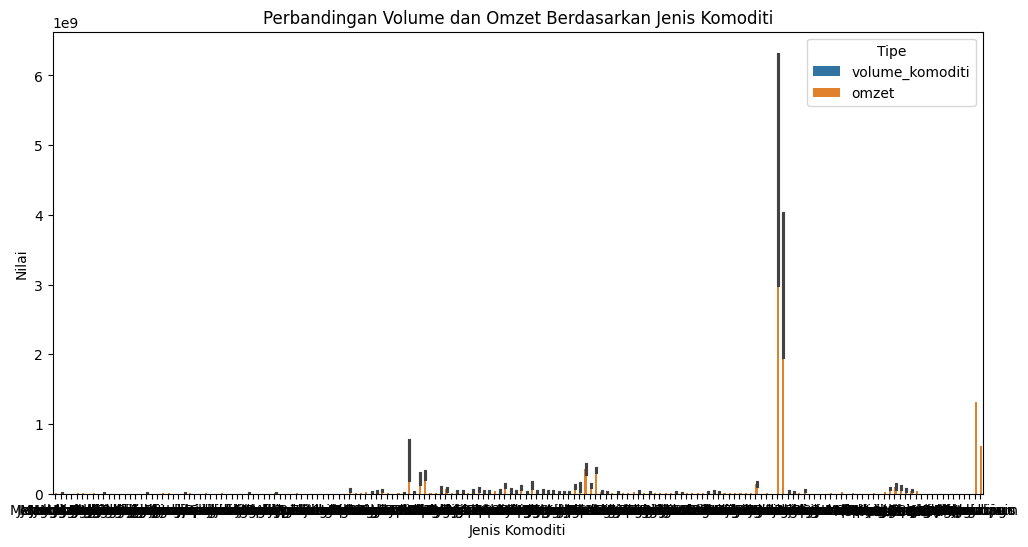

In [ ]:
plt.figure(figsize=(12, 6))
df_melted = df.melt(id_vars='jenis_komoditi', value_vars=['volume_komoditi', 'omzet'],
                    var_name='Tipe', value_name='Nilai')
sns.barplot(data=df_melted, x='jenis_komoditi', y='Nilai', hue='Tipe')
plt.title('Perbandingan Volume dan Omzet Berdasarkan Jenis Komoditi')
plt.xlabel('Jenis Komoditi')
plt.ylabel('Nilai')
plt.legend(title='Tipe')
plt.show()

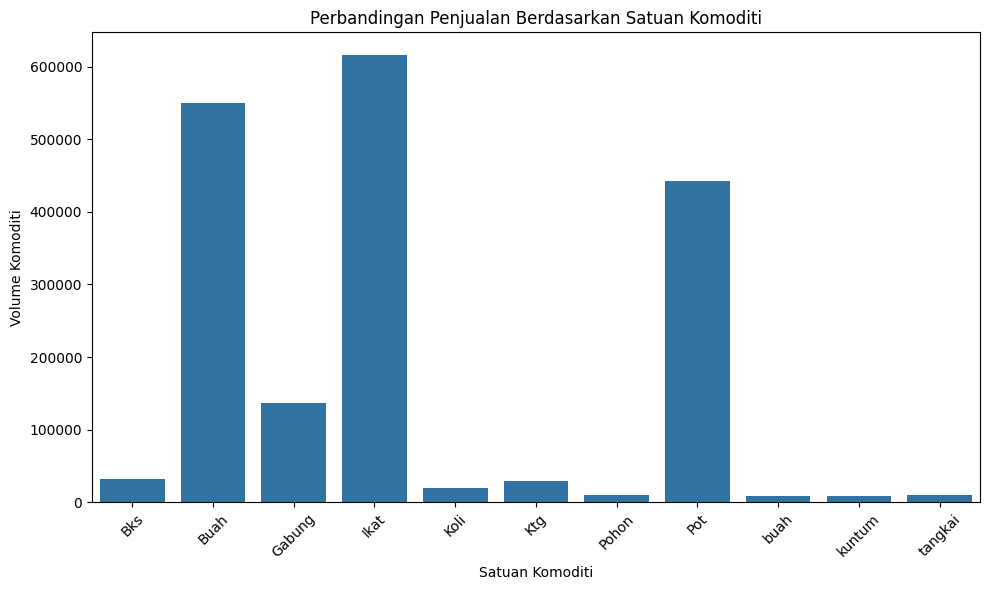

In [ ]:
df_grouped = df.groupby('satuan_komoditi')['volume_komoditi'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped, x='satuan_komoditi', y='volume_komoditi')
plt.title('Perbandingan Penjualan Berdasarkan Satuan Komoditi')
plt.xlabel('Satuan Komoditi')
plt.ylabel('Volume Komoditi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

data1 = pd.DataFrame(data)

scaler = MinMaxScaler()
scaled_data = data1.copy()
numeric_columns = ['volume_komoditi', 'omzet']
scaled_data[numeric_columns] = scaler.fit_transform(data1[numeric_columns])

In [ ]:
from sklearn.preprocessing import normalize
original= data.copy()
data_scaled = normalize(original)
data_scaled = pd.DataFrame(data_scaled, columns=original.columns)
datasc=data_scaled.copy()
data_scaled.head()

ValueError: could not convert string to float: 'Penangkar Bibit Ragunan'

# Dendogram

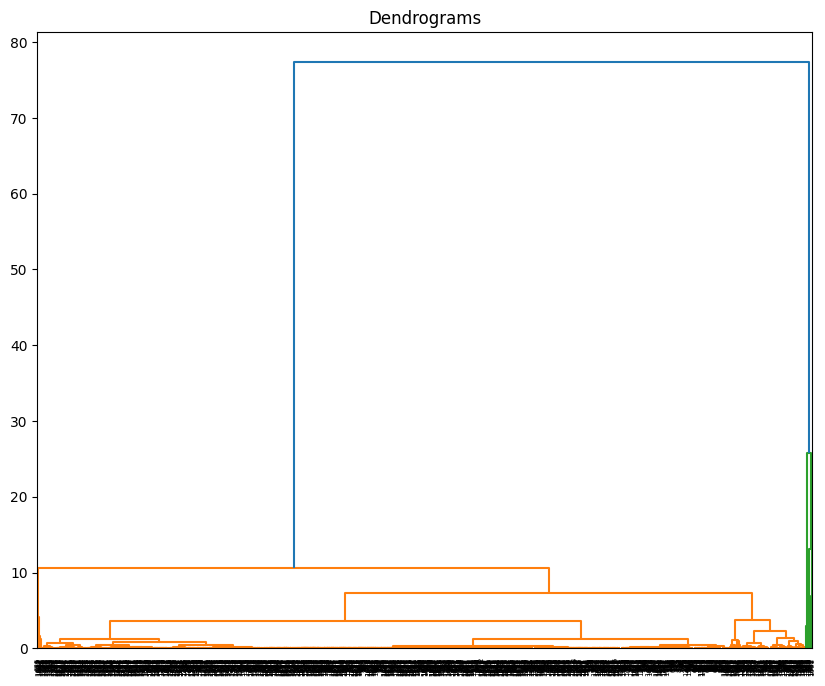

In [ ]:
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(10, 8))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(scaled_data[numeric_columns], method='ward'))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

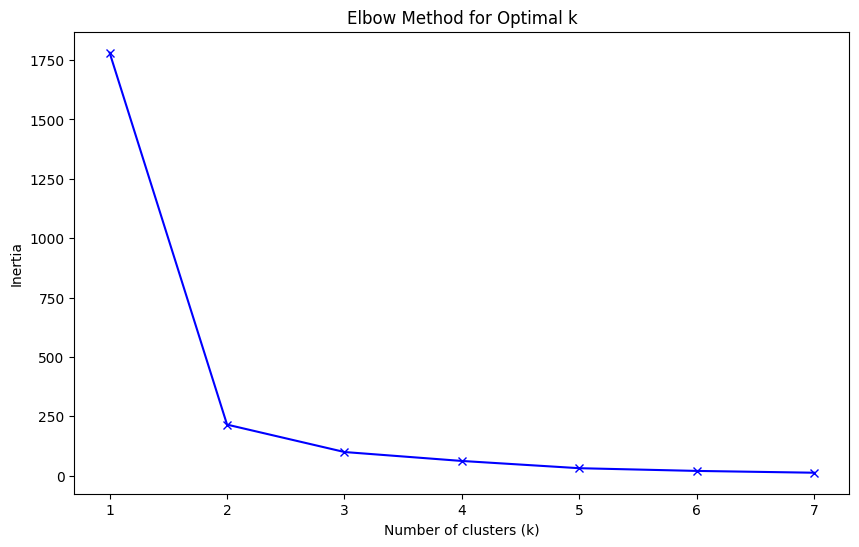

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


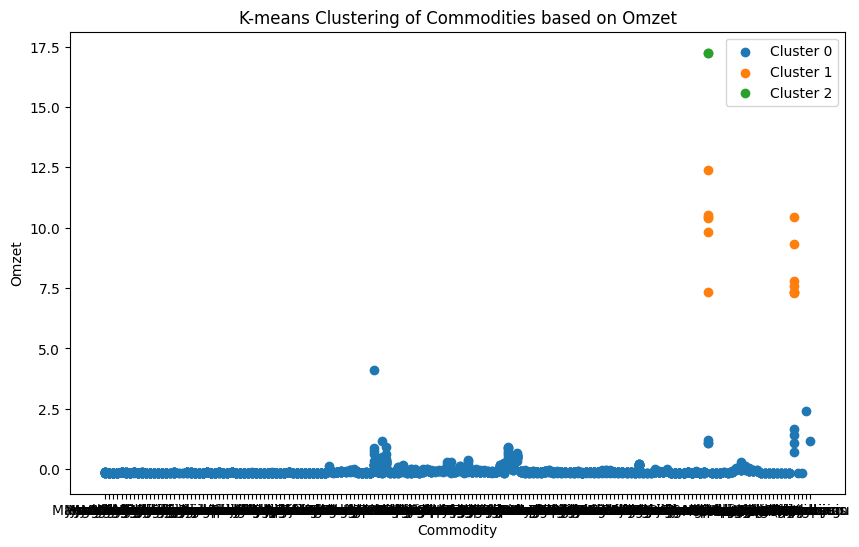

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
omzet = data1['omzet'].values.reshape(-1, 1)
omzet_scaled = scaler.fit_transform(omzet)

inertia = []
K = range(1, 8)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(omzet_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method result
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Assuming you choose an optimal k (e.g., k=3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=0).fit(omzet_scaled)
df['cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
for i in range(k):
    cluster = df[df['cluster'] == i]
    plt.scatter(cluster['jenis_komoditi'], cluster['omzet'], label=f'Cluster {i}')
plt.xlabel('Commodity')
plt.ylabel('Omzet')
plt.title('K-means Clustering of Commodities based on Omzet')
plt.legend()
plt.show()